In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from bayes_opt import BayesianOptimization
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score,make_scorer
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from bayes_opt.util import UtilityFunction

In [2]:
dc_data =pd.read_csv("data/DieCasting_Raw_Data.csv")
dc_data

,Shot,Velocity_1,Velocity_2,Velocity_3,High_Velocity,Cylinder_Pressure,Rapid_Rise_Time,Biscuit_Thickness,Clamping_Force,Cycle_Time,Pressure_Rise_Time,Casting_Pressure,Spray_Time,Spray_1_Time,Spray_2_Time,Machine_Status,_id
0,1,0.144,0.170,0.188,2.134,214.0,0.008,10.0,258.0,20.7,0.044,1037.0,7.8,0.7,0.8,0.0,10001
1,2,0.144,0.170,0.182,2.124,217.0,0.008,11.0,257.0,20.7,0.044,1052.0,7.8,0.7,0.8,0.0,20002
2,3,0.144,0.170,0.182,2.116,214.0,0.008,11.0,257.0,20.8,0.041,1037.0,7.8,0.7,0.8,0.0,30003
3,4,0.144,0.170,0.182,2.137,217.0,0.008,11.0,257.0,20.7,0.043,1051.0,7.8,0.7,0.8,0.0,40004
4,5,0.144,0.172,0.176,2.111,217.0,0.008,12.0,257.0,20.7,0.042,1052.0,7.8,0.7,0.8,0.0,50005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,657,0.144,0.173,0.200,2.536,264.0,0.012,17.0,381.0,36.3,0.036,595.0,12.1,2.0,2.0,0.0,51570657
5157,658,0.144,0.173,0.200,2.536,264.0,0.012,17.0,381.0,36.3,0.036,595.0,12.1,2.0,2.0,0.0,51580658
5158,659,0.150,0.166,0.210,2.492,265.0,0.011,17.0,381.0,36.2,0.033,595.0,12.1,2.0,2.0,0.0,51590659
5159,660,0.144,0.174,0.206,2.514,264.0,0.011,16.0,381.0,36.2,0.041,595.0,12.1,2.0,2.0,0.0,51600660


In [3]:
dc_data.columns

Index(['Shot', 'Velocity_1', 'Velocity_2', 'Velocity_3', 'High_Velocity',
       'Cylinder_Pressure', 'Rapid_Rise_Time', 'Biscuit_Thickness',
       'Clamping_Force', 'Cycle_Time', 'Pressure_Rise_Time',
       'Casting_Pressure', 'Spray_Time', 'Spray_1_Time', 'Spray_2_Time',
       'Machine_Status', '_id'],
      dtype='object')

In [4]:
dc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5161 entries, 0 to 5160
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shot                5161 non-null   int64  
 1   Velocity_1          4751 non-null   float64
 2   Velocity_2          4752 non-null   float64
 3   Velocity_3          4752 non-null   float64
 4   High_Velocity       4752 non-null   float64
 5   Cylinder_Pressure   4752 non-null   float64
 6   Rapid_Rise_Time     4752 non-null   float64
 7   Biscuit_Thickness   4752 non-null   float64
 8   Clamping_Force      4752 non-null   float64
 9   Cycle_Time          4752 non-null   float64
 10  Pressure_Rise_Time  4752 non-null   float64
 11  Casting_Pressure    4752 non-null   float64
 12  Spray_Time          4752 non-null   float64
 13  Spray_1_Time        4752 non-null   float64
 14  Spray_2_Time        4752 non-null   float64
 15  Machine_Status      5048 non-null   float64
 16  _id   

In [5]:
dc_data.describe()

,Shot,Velocity_1,Velocity_2,Velocity_3,High_Velocity,Cylinder_Pressure,Rapid_Rise_Time,Biscuit_Thickness,Clamping_Force,Cycle_Time,Pressure_Rise_Time,Casting_Pressure,Spray_Time,Spray_1_Time,Spray_2_Time,Machine_Status,_id
count,5161.000000,4751.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,5048.000000,5.161000e+03
mean,467.365046,0.147955,0.168650,0.190742,2.299434,237.204545,0.009492,14.171507,303.514099,32.213952,0.039968,858.852904,9.650926,1.395412,1.406334,0.023376,2.581047e+07
std,310.382804,0.007051,0.004438,0.011577,0.317779,26.132127,0.002347,3.388145,55.962362,129.034944,0.026683,236.010235,1.795731,0.554061,0.752698,0.151108,1.489992e+07
min,0.000000,0.134000,0.158000,0.172000,0.000000,89.000000,0.000000,0.000000,222.000000,20.200000,0.000000,200.000000,7.000000,0.700000,0.700000,0.000000,1.000100e+04
25%,216.000000,0.142000,0.166000,0.181000,2.133000,217.000000,0.008000,11.000000,255.000000,20.800000,0.036000,596.000000,8.000000,1.000000,0.800000,0.000000,1.291018e+07
50%,431.000000,0.144000,0.168000,0.187000,2.159000,219.000000,0.008000,13.000000,258.000000,21.400000,0.041000,1037.000000,8.500000,1.200000,0.800000,0.000000,2.581018e+07
75%,650.000000,0.155000,0.170000,0.202000,2.524000,265.000000,0.012000,17.000000,364.000000,35.900000,0.043000,1053.000000,12.000000,2.000000,2.000000,0.000000,3.871010e+07
max,1296.000000,0.180000,0.212000,0.234000,2.744000,266.000000,0.021000,28.000000,388.000000,6170.000000,1.490000,1164.000000,13.100000,2.500000,3.000000,1.000000,5.161066e+07


In [6]:
dc_data.count()

Shot                  5161
Velocity_1            4751
Velocity_2            4752
Velocity_3            4752
High_Velocity         4752
Cylinder_Pressure     4752
Rapid_Rise_Time       4752
Biscuit_Thickness     4752
Clamping_Force        4752
Cycle_Time            4752
Pressure_Rise_Time    4752
Casting_Pressure      4752
Spray_Time            4752
Spray_1_Time          4752
Spray_2_Time          4752
Machine_Status        5048
_id                   5161
dtype: int64

In [7]:
dc_data_drop =dc_data.drop(['Shot','_id'],axis=1)

In [8]:
print(dc_data_drop.isnull().sum())

Velocity_1            410
Velocity_2            409
Velocity_3            409
High_Velocity         409
Cylinder_Pressure     409
Rapid_Rise_Time       409
Biscuit_Thickness     409
Clamping_Force        409
Cycle_Time            409
Pressure_Rise_Time    409
Casting_Pressure      409
Spray_Time            409
Spray_1_Time          409
Spray_2_Time          409
Machine_Status        113
dtype: int64


In [9]:
dc_data_drop.isnull().sum(1).value_counts()

0     4721
14     326
15      83
1       31
dtype: int64

In [10]:
dc_data_drop =dc_data_drop.dropna()
dc_data_drop =dc_data_drop.reset_index(drop=True)

In [11]:
dc_data_drop.isnull().sum()

Velocity_1            0
Velocity_2            0
Velocity_3            0
High_Velocity         0
Cylinder_Pressure     0
Rapid_Rise_Time       0
Biscuit_Thickness     0
Clamping_Force        0
Cycle_Time            0
Pressure_Rise_Time    0
Casting_Pressure      0
Spray_Time            0
Spray_1_Time          0
Spray_2_Time          0
Machine_Status        0
dtype: int64

<Axes: >

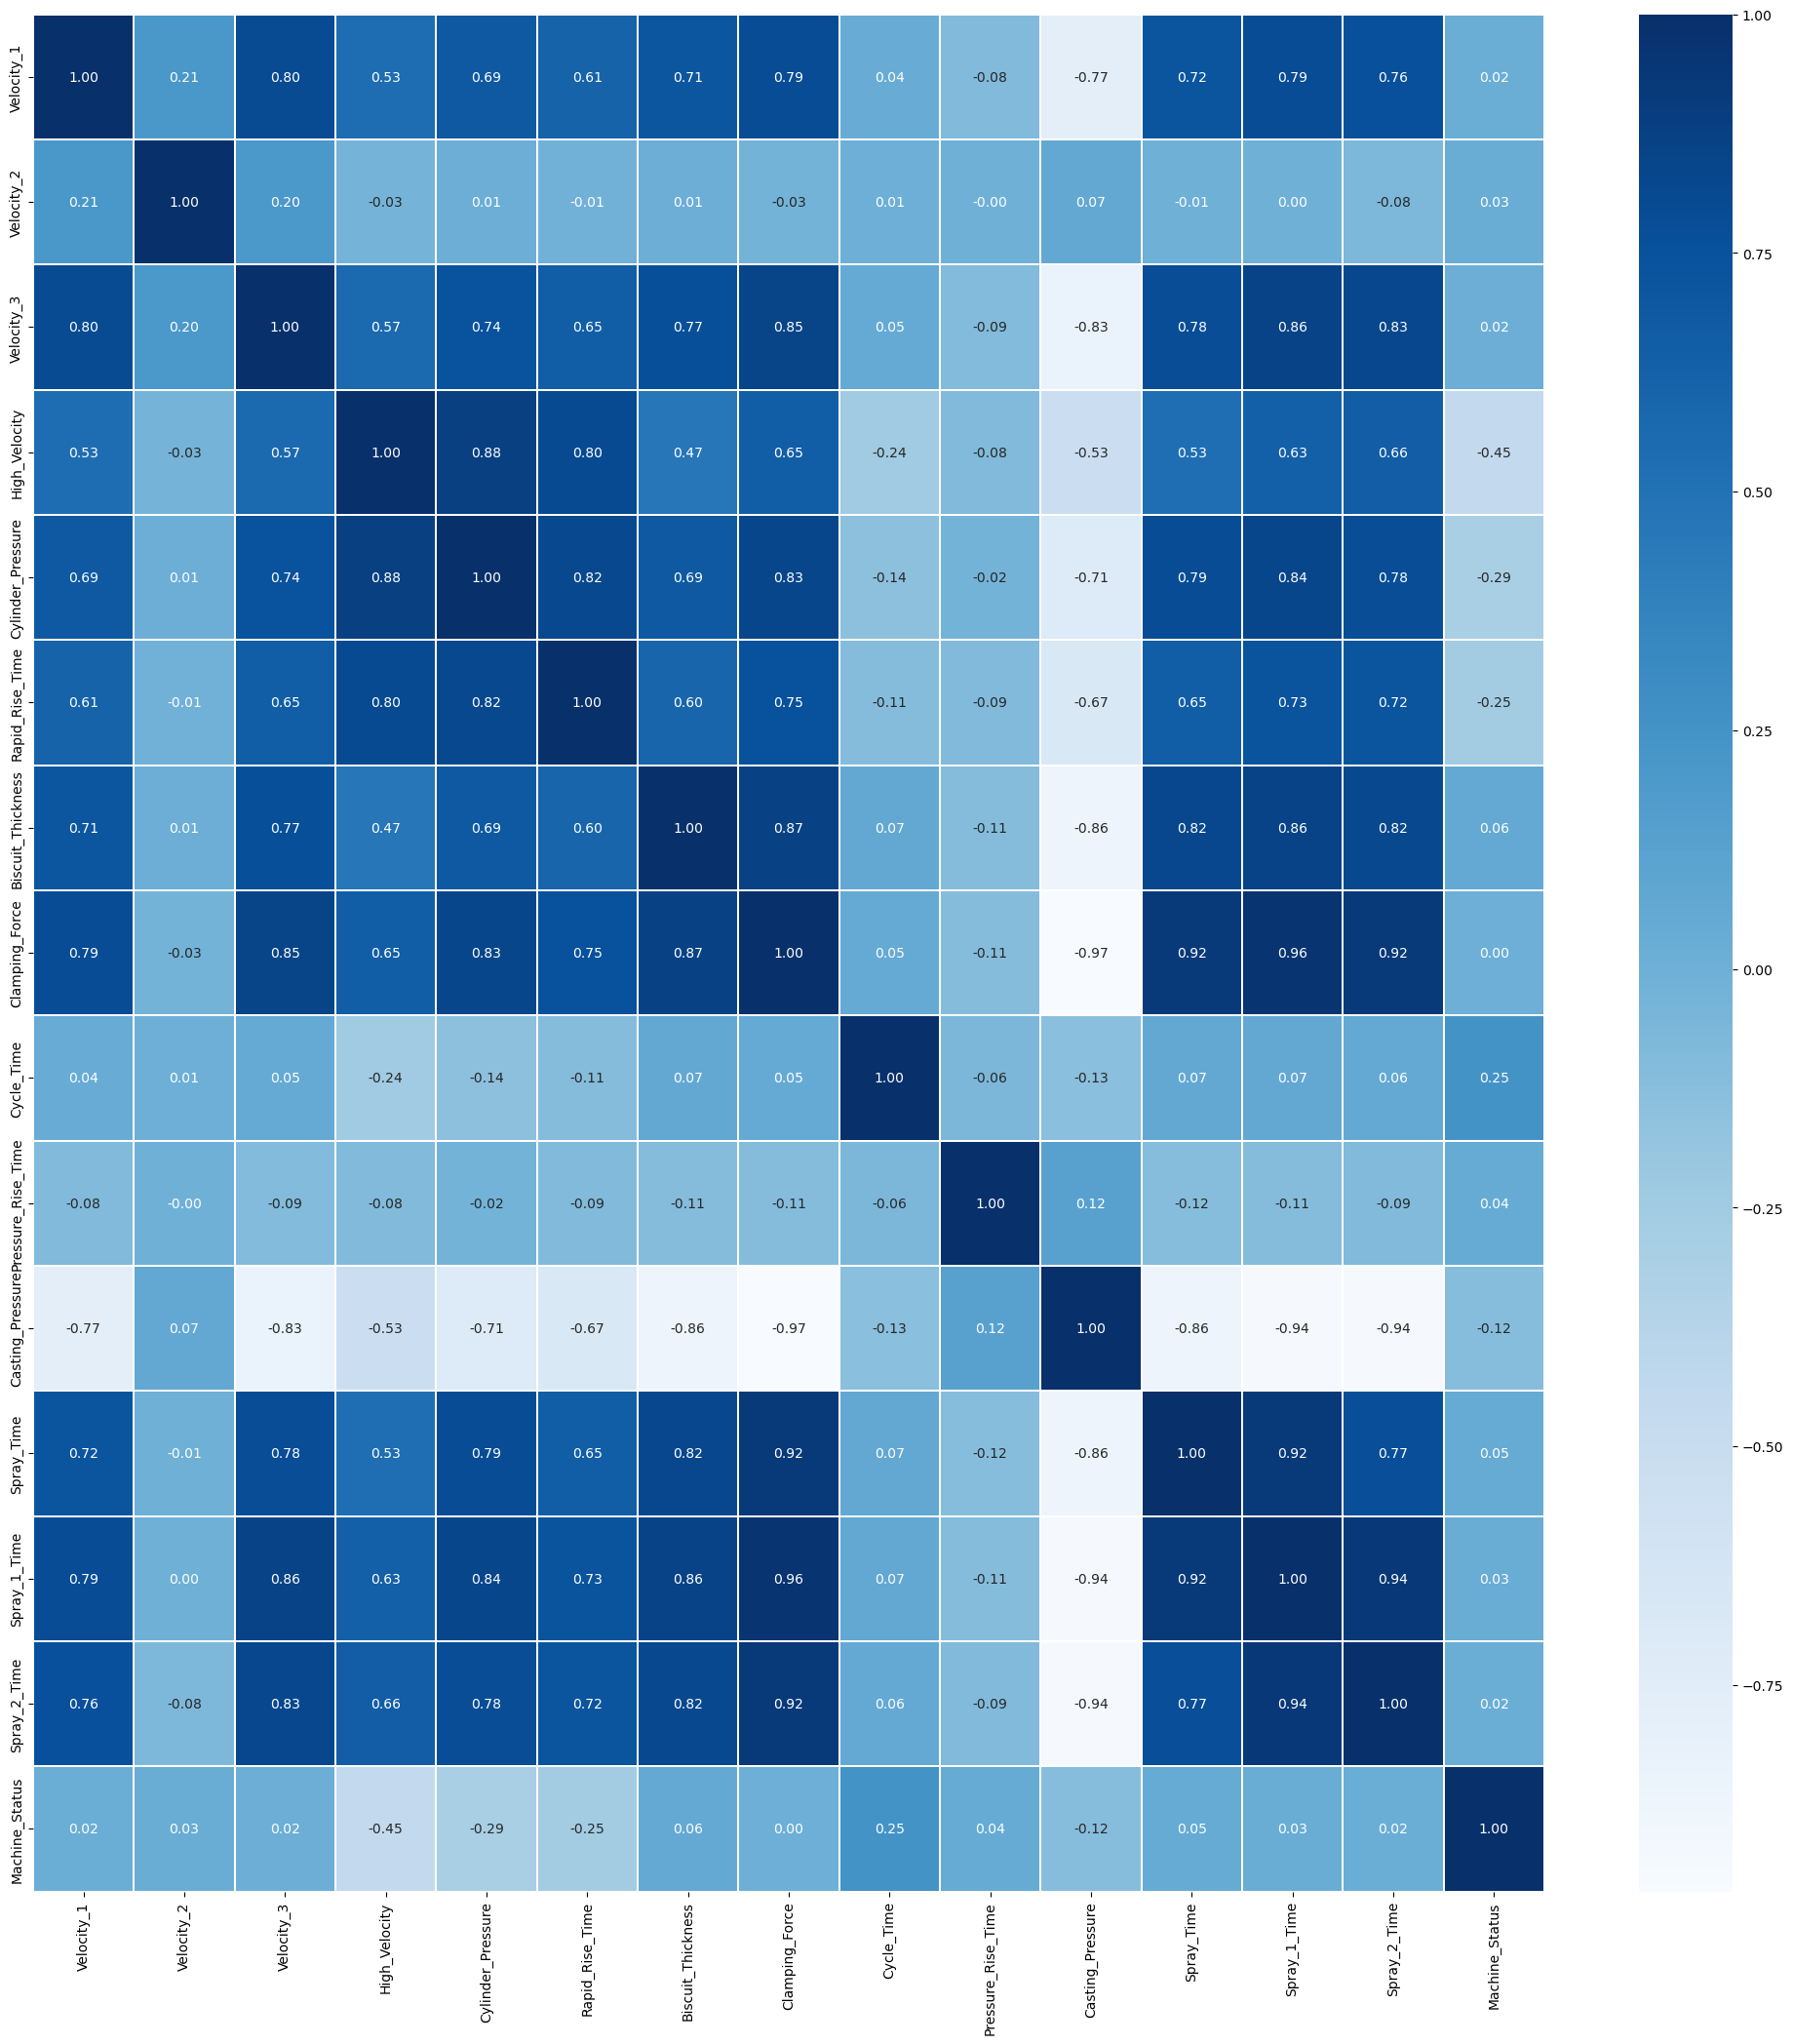

In [12]:
plt.subplots(figsize=(25,25))
sns.heatmap(data =dc_data_drop.corr(),linewidths=0.1,annot=True,
 fmt ='.2f',cmap='Blues')

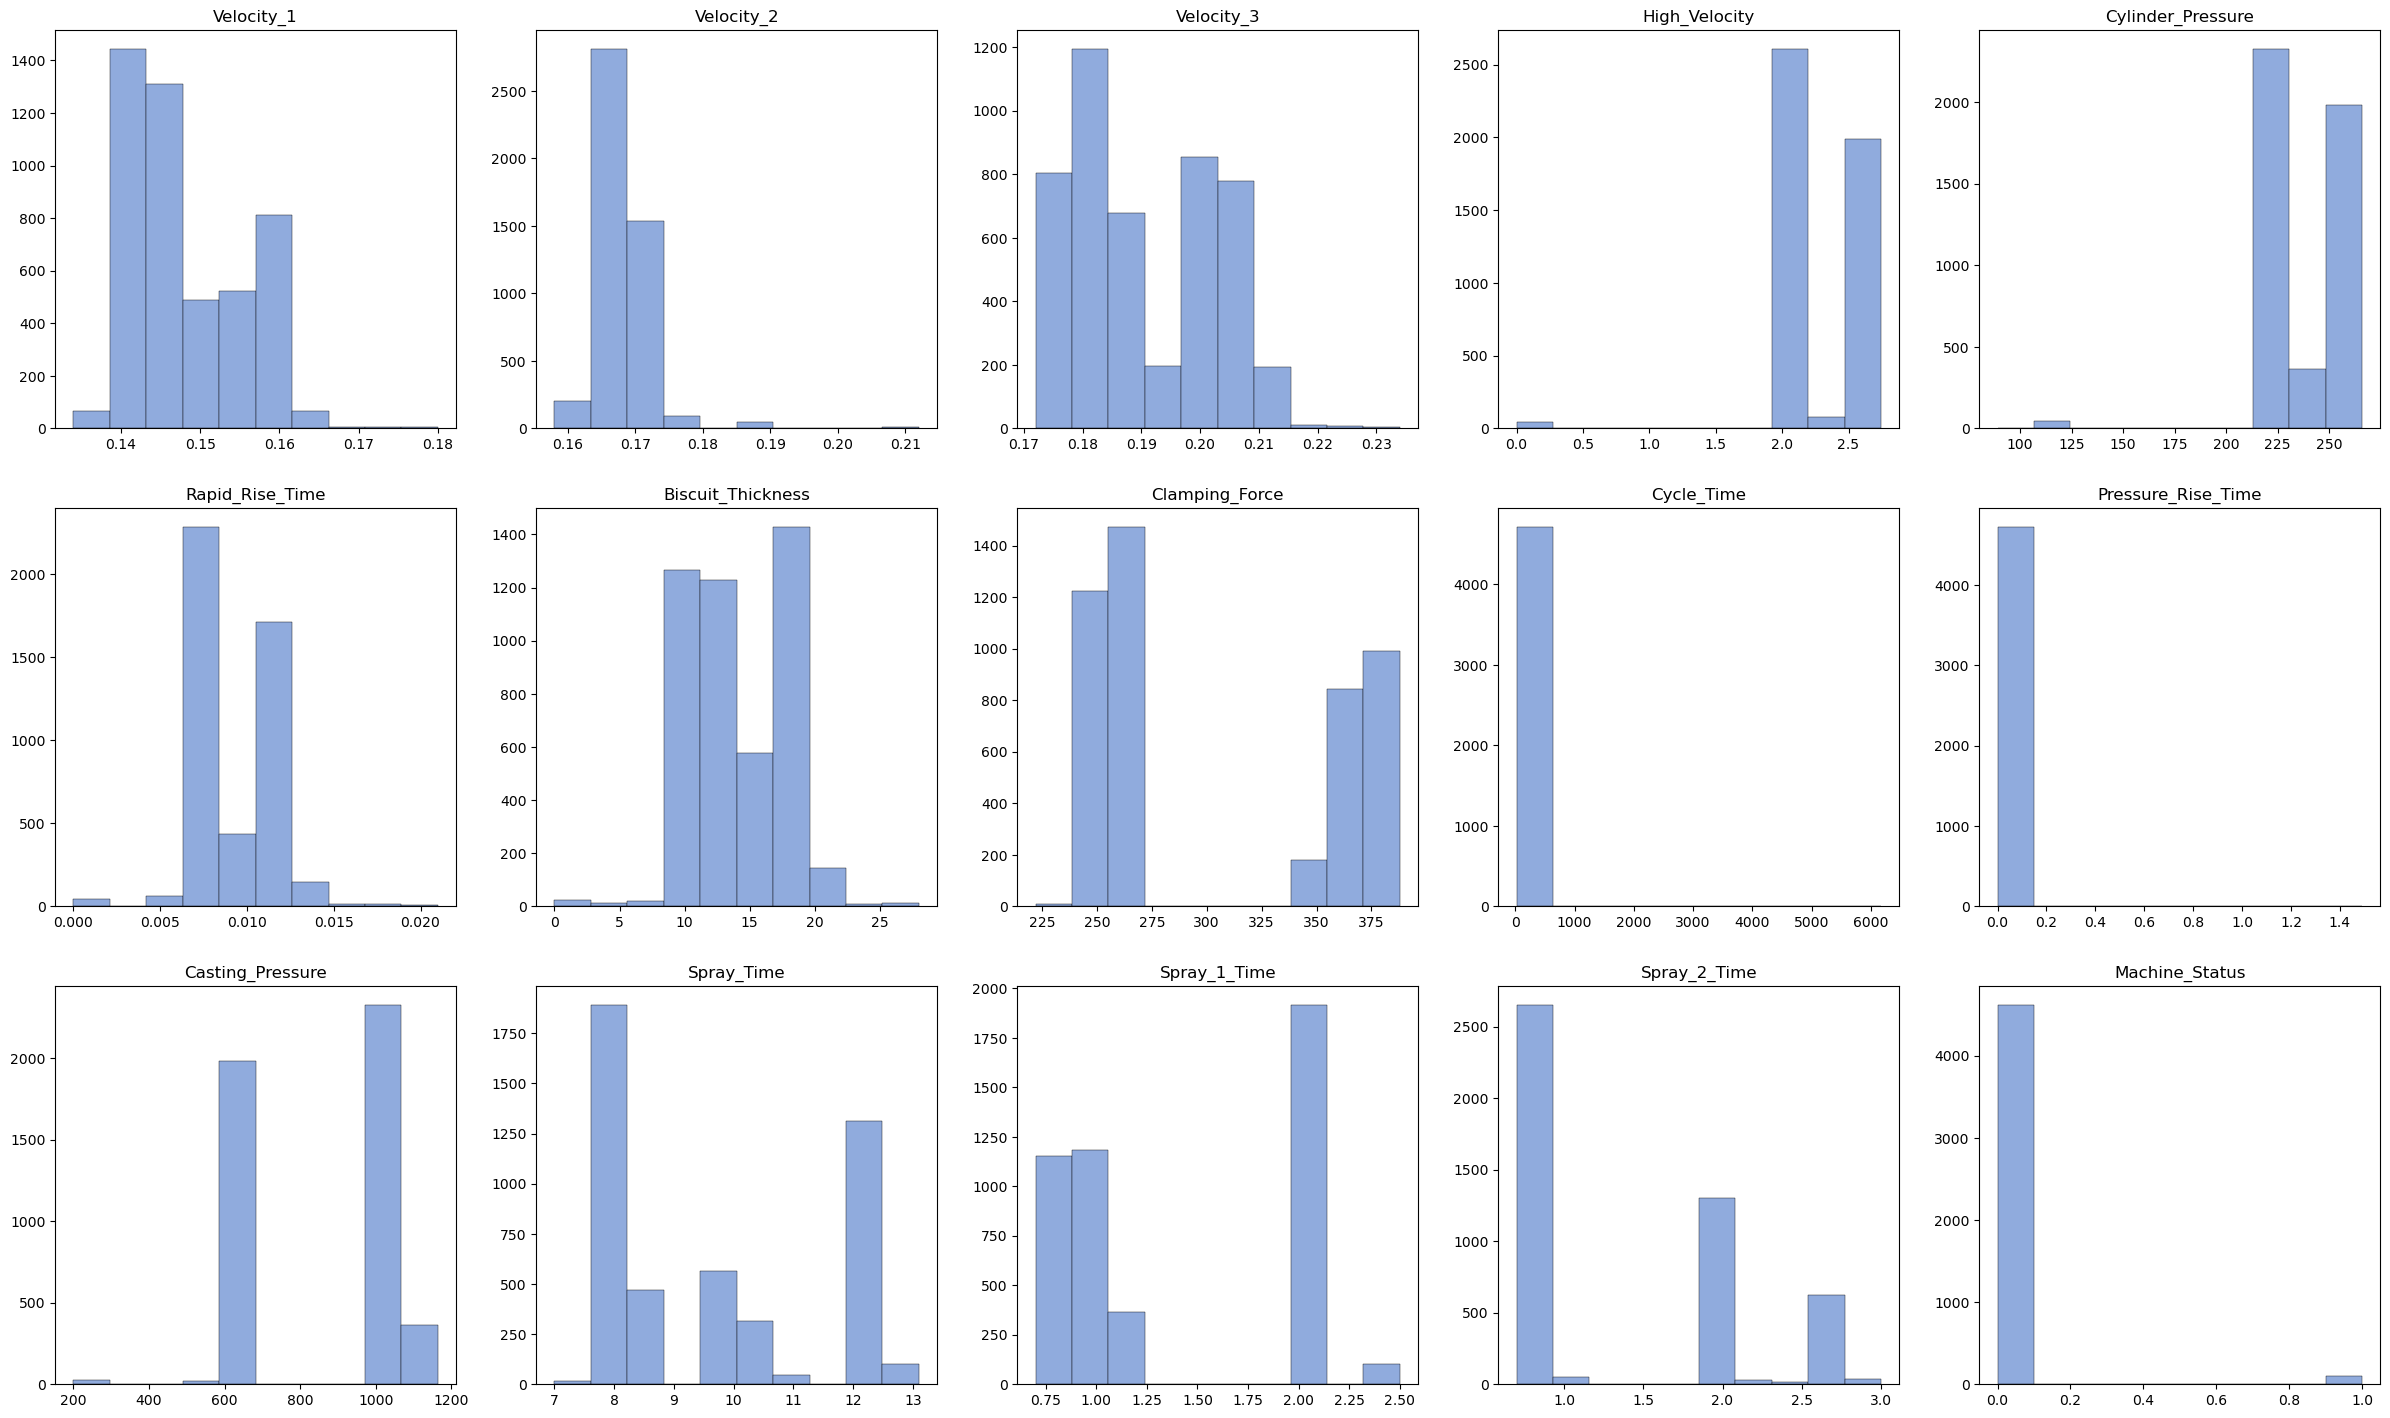

In [13]:
plt.figure(figsize =(30,30))
# 각 변수의 막대그래프 개수
bin =[10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]
for index,value in enumerate(dc_data_drop):
 sub =plt.subplot(5,5,index +1)
 sub.hist(dc_data_drop[value],bins =bin[index],
 facecolor =(144/255,171/255,221/255),linewidth=.3,edgecolor ='black')
 plt.title(value)

In [14]:
dc_data_drop['Machine_Status'].value_counts()

0.0    4617
1.0     104
Name: Machine_Status, dtype: int64

In [15]:
scaler =MinMaxScaler(feature_range=(0,1))
dc_data_scaler =scaler.fit_transform(dc_data_drop)
#다시 데이터프레임 형식으로 바꿔주기
dc_data_scaler =pd.DataFrame(dc_data_scaler)
dc_data_scaler.columns = dc_data_drop.columns
dc_data_scaler

,Velocity_1,Velocity_2,Velocity_3,High_Velocity,Cylinder_Pressure,Rapid_Rise_Time,Biscuit_Thickness,Clamping_Force,Cycle_Time,Pressure_Rise_Time,Casting_Pressure,Spray_Time,Spray_1_Time,Spray_2_Time,Machine_Status
0,0.217391,0.222222,0.258065,0.777697,0.706215,0.380952,0.357143,0.216867,0.000081,0.029530,0.868257,0.131148,0.000000,0.043478,0.0
1,0.217391,0.222222,0.161290,0.774052,0.723164,0.380952,0.392857,0.210843,0.000081,0.029530,0.883817,0.131148,0.000000,0.043478,0.0
2,0.217391,0.222222,0.161290,0.771137,0.706215,0.380952,0.392857,0.210843,0.000098,0.027517,0.868257,0.131148,0.000000,0.043478,0.0
3,0.217391,0.222222,0.161290,0.778790,0.723164,0.380952,0.392857,0.210843,0.000081,0.028859,0.882780,0.131148,0.000000,0.043478,0.0
4,0.217391,0.259259,0.064516,0.769315,0.723164,0.380952,0.428571,0.210843,0.000081,0.028188,0.883817,0.131148,0.000000,0.043478,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4716,0.217391,0.277778,0.451613,0.924198,0.988701,0.571429,0.607143,0.957831,0.002618,0.024161,0.409751,0.836066,0.722222,0.565217,0.0
4717,0.217391,0.277778,0.451613,0.924198,0.988701,0.571429,0.607143,0.957831,0.002618,0.024161,0.409751,0.836066,0.722222,0.565217,0.0
4718,0.347826,0.148148,0.612903,0.908163,0.994350,0.523810,0.607143,0.957831,0.002602,0.022148,0.409751,0.836066,0.722222,0.565217,0.0
4719,0.217391,0.296296,0.548387,0.916181,0.988701,0.523810,0.571429,0.957831,0.002602,0.027517,0.409751,0.836066,0.722222,0.565217,0.0


In [16]:
#독립변수
X =dc_data_scaler.drop(columns=['Machine_Status'])
#종속변수
Y =dc_data_scaler['Machine_Status']
train_x,test_x,train_y,test_y =train_test_split(X,Y,test_size =0.3,random_state =42)

In [17]:
smote =SMOTE(random_state=42)
X_train_over,y_train_over =smote.fit_resample(train_x,train_y)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ",train_x.shape,train_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :',X_train_over.shape,y_train_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (3304, 14) (3304,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (6468, 14) (6468,)
SMOTE 적용 후 값의 분포 :
 0.0    3234
1.0    3234
Name: Machine_Status, dtype: int64


In [18]:
def RF(n_estimators,max_depth,min_samples_split,min_samples_leaf,max_leaf_nodes):
 model =RandomForestClassifier(n_estimators = int(round(n_estimators)),
 max_depth =int(round(max_depth)),
 min_samples_split =int(round(min_samples_split)),
 min_samples_leaf =int(round(min_samples_leaf)),
 max_leaf_nodes =int(round(max_leaf_nodes))
 )
 scoring ={'f1_score':make_scorer(f1_score)}
 result =cross_validate(model,X_train_over,y_train_over,cv=5,scoring=scoring)
 auc_score =result["test_f1_score"].mean()
 return auc_score

In [19]:
pbounds ={'n_estimators':(1,200),
 'max_depth':(2,25),
 'min_samples_split':(2,20),
 'min_samples_leaf':(1,10),
 'max_leaf_nodes':(2,25),
 }

In [20]:
from bayes_opt import BayesianOptimization
from bayes_opt.util import UtilityFunction

In [21]:
utility = UtilityFunction(kind='ei', xi=0.01)
LFBO =BayesianOptimization(f =RF,pbounds =pbounds,verbose =2,random_state =0 )
LFBO.maximize(init_points=5,n_iter =20,acquisition_function=utility)

|   iter    |  target   | max_depth | max_le... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.9772    | 14.62     | 18.45     | 6.425     | 11.81     | 85.31     |
| 2         | 0.955     | 16.86     | 12.06     | 9.026     | 19.35     | 77.3      |
| 3         | 0.9603    | 20.21     | 14.16     | 6.112     | 18.66     | 15.14     |
| 4         | 0.7477    | 4.004     | 2.465     | 8.494     | 16.01     | 174.1     |
| 5         | 0.9813    | 24.51     | 20.38     | 5.153     | 16.05     | 24.54     |
| 6         | 0.9867    | 25.0      | 25.0      | 1.0       | 2.0       | 56.88     |
| 7         | 0.8362    | 2.0       | 25.0      | 1.0       | 2.0       | 68.19     |
| 8         | 0.9805    | 25.0      | 18.64     | 3.166     | 2.0       | 39.61     |
| 9         | 0.9841    | 25.0      | 22.47     | 9.661     | 12.81     | 97.89     |
| 10        | 0.944     | 25.0      | 7.019     | 1.0 

In [22]:
LFBO.max

{'target': 0.9874716170329538,
 'params': {'max_depth': 15.255834620708274,
  'max_leaf_nodes': 25.0,
  'min_samples_leaf': 1.0,
  'min_samples_split': 2.0,
  'n_estimators': 104.24476655931055}}

In [23]:
rfc =RandomForestClassifier(n_estimators=101,max_depth=25,max_leaf_nodes =25,
 min_samples_leaf =1,min_samples_split =6,random_state=0)
#모델 훈련
rfc.fit(X_train_over,y_train_over)

RandomForestClassifier(max_depth=25, max_leaf_nodes=25, min_samples_split=6,
                       n_estimators=101, random_state=0)

In [24]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
 print('오차행렬 \n',confusion_matrix(y_test,pred))
 print('정확도 :',accuracy_score(y_test,pred))
 
def get_model_train_eval(model,ftr_train =None,ftr_test =None,tgt_train=None,tgt_test=None):
 model.fit(ftr_train,tgt_train)
 pred =model.predict(ftr_test)
 pred_proba =model.predict_proba(ftr_test)[:,1]
 get_clf_eval(tgt_test,pred,pred_proba)
 
get_model_train_eval(rfc,X_train_over,test_x,y_train_over,test_y)

오차행렬 
 [[1364   19]
 [  11   23]]
정확도 : 0.9788285109386027


<Axes: >

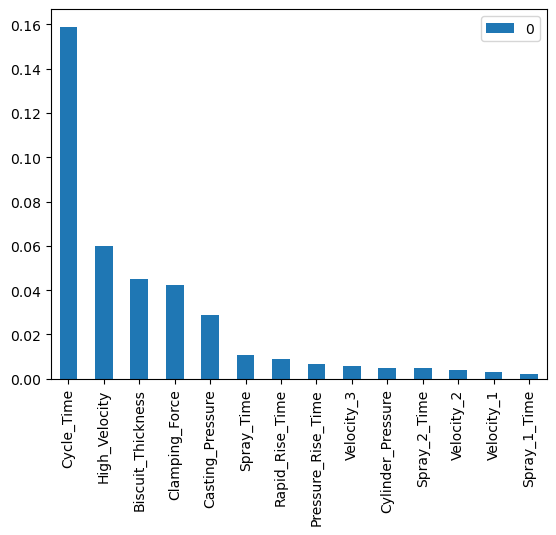

In [25]:
result_rfc =permutation_importance(rfc,X_train_over,y_train_over,
 n_repeats=10,random_state=333,n_jobs=2)
sorted_idx_rfc =result_rfc.importances_mean.argsort()
importances_rf =pd.DataFrame(result_rfc.importances_mean[sorted_idx_rfc],
index=X_train_over.columns[sorted_idx_rfc]).sort_values(0,ascending=False).iloc[:45]
importances_rf.plot.bar()

In [26]:
Iqr_dc_data =dc_data_drop.loc[:,['Cycle_Time','High_Velocity',
 'Biscuit_Thickness','Clamping_Force',
 'Casting_Pressure','Machine_Status']]
Iqr_dc_data =Iqr_dc_data[Iqr_dc_data['Machine_Status']==0]
Iqr_dc_data =Iqr_dc_data.drop(['Machine_Status'],axis=1)
Iqr_dc_data =Iqr_dc_data.reset_index(drop=True)
Iqr_dc_data

,Cycle_Time,High_Velocity,Biscuit_Thickness,Clamping_Force,Casting_Pressure
0,20.7,2.134,10.0,258.0,1037.0
1,20.7,2.124,11.0,257.0,1052.0
2,20.8,2.116,11.0,257.0,1037.0
3,20.7,2.137,11.0,257.0,1051.0
4,20.7,2.111,12.0,257.0,1052.0
...,...,...,...,...,...
4612,36.3,2.536,17.0,381.0,595.0
4613,36.3,2.536,17.0,381.0,595.0
4614,36.2,2.492,17.0,381.0,595.0
4615,36.2,2.514,16.0,381.0,595.0


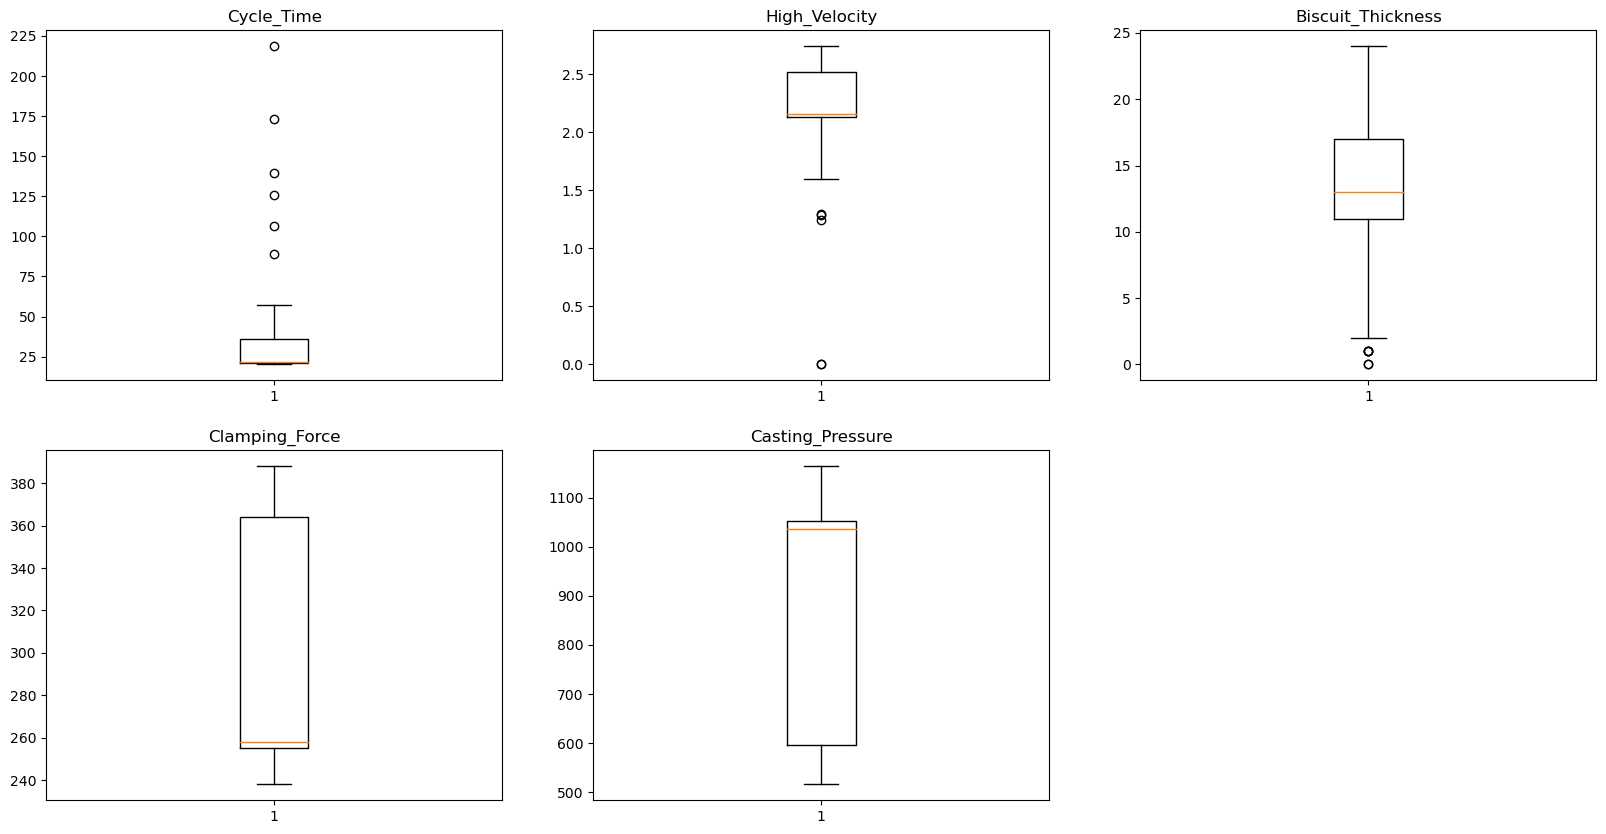

In [27]:
plt.figure(figsize =(20,10))
for index,value in enumerate(Iqr_dc_data):
 sub =plt.subplot(2,3,index+1)
 sub.boxplot(Iqr_dc_data[value])
 plt.title(value)

In [28]:
def outliers_iqr(data):
 q1,q3 =np.percentile(data,[25,75])
 iqr =q3 -q1
 lower_bound =q1 -(iqr*1.5)
 upper_bound =q3 +(iqr*1.5)
 return np.where((data<lower_bound)|(data>upper_bound))

In [29]:
Cycle_Time_outlier =outliers_iqr(Iqr_dc_data['Cycle_Time'])[0]
High_Vel_outlier =outliers_iqr(Iqr_dc_data['High_Velocity'])[0]
Biscuit_Thk_outlier =outliers_iqr(Iqr_dc_data['Biscuit_Thickness'])[0]
Clamp_F_outlier =outliers_iqr(Iqr_dc_data['Clamping_Force'])[0]
Casting_Pre_outlier =outliers_iqr(Iqr_dc_data['Casting_Pressure'])[0]
lead_outlier_index =np.concatenate((Cycle_Time_outlier,Clamp_F_outlier,
 Biscuit_Thk_outlier,Casting_Pre_outlier,
 High_Vel_outlier),axis=None)
#중복 iedex 제거
lead_outlier_index =list(set(lead_outlier_index))
print("CyCle_Time의 이상치 개수: ",len(Cycle_Time_outlier))
print("High_Velocity의 이상치 개수: ",len(High_Vel_outlier))
print("Biscuit_Thickness의 이상치 개수: ",len(Biscuit_Thk_outlier))
print("Clamping_Force의 이상치 개수: ",len(Clamp_F_outlier))
print("Casting_Pressure의 이상치 개수: ",len(Casting_Pre_outlier))
print("전체 이상치 개수",len(lead_outlier_index))

CyCle_Time의 이상치 개수:  6
High_Velocity의 이상치 개수:  5
Biscuit_Thickness의 이상치 개수:  6
Clamping_Force의 이상치 개수:  0
Casting_Pressure의 이상치 개수:  0
전체 이상치 개수 14


In [30]:
Iqr_dc_data_clean=[]
not_outlier_index=[]
for j in Iqr_dc_data.index:
 if j not in lead_outlier_index:
     not_outlier_index.append(j)
data_n_lot_clean =Iqr_dc_data.loc[not_outlier_index]
data_n_lot_clean =data_n_lot_clean.reset_index(drop=True)
Iqr_dc_data_clean.append(data_n_lot_clean)
Iqr_dc_data_clean =Iqr_dc_data_clean[0]
print(Iqr_dc_data.shape,Iqr_dc_data_clean.shape)

(4617, 5) (4603, 5)


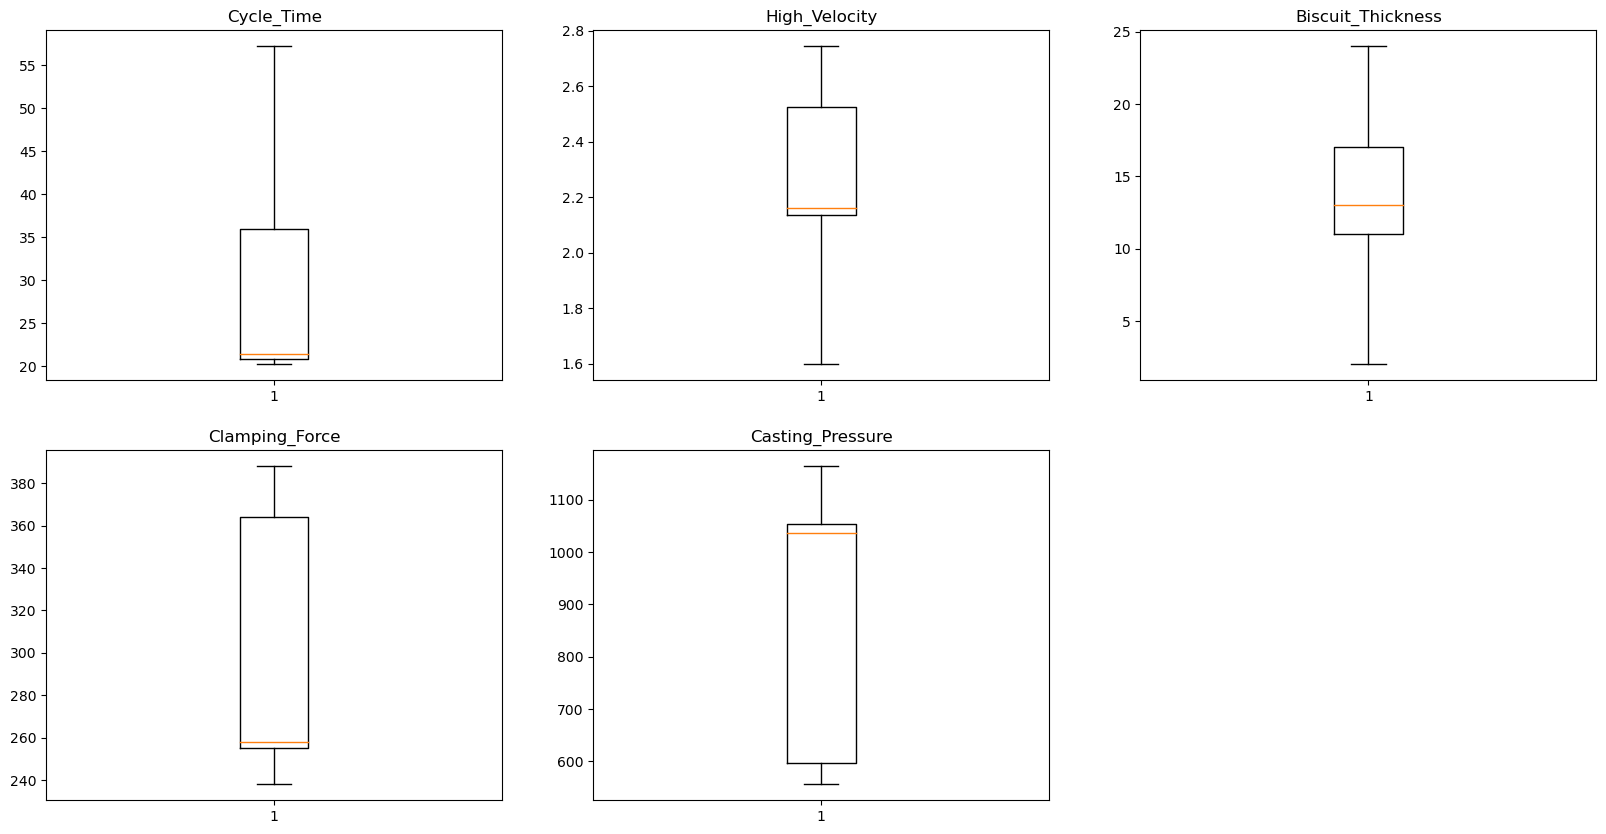

In [31]:
plt.figure(figsize =(20,10))
for index,value in enumerate(Iqr_dc_data_clean):
 sub =plt.subplot(2,3,index+1)
 sub.boxplot(Iqr_dc_data_clean[value])
 plt.title(value)

In [32]:
for i in Iqr_dc_data_clean.columns:
 a =Iqr_dc_data_clean[i].max()
 b =Iqr_dc_data_clean[i].min()
 print(f'{i}의 범위: {b} ~ {a}')

Cycle_Time의 범위: 20.2 ~ 57.2
High_Velocity의 범위: 1.597 ~ 2.744
Biscuit_Thickness의 범위: 2.0 ~ 24.0
Clamping_Force의 범위: 238.0 ~ 388.0
Casting_Pressure의 범위: 556.0 ~ 1164.0


In [33]:
# 부록

In [34]:
dc_df = pd.read_csv("data/DieCasting_Raw_Data.csv")
dc_data = dc_df.dropna()
dc_data = dc_data.reset_index(drop=True)
dc_data

,Shot,Velocity_1,Velocity_2,Velocity_3,High_Velocity,Cylinder_Pressure,Rapid_Rise_Time,Biscuit_Thickness,Clamping_Force,Cycle_Time,Pressure_Rise_Time,Casting_Pressure,Spray_Time,Spray_1_Time,Spray_2_Time,Machine_Status,_id
0,1,0.144,0.170,0.188,2.134,214.0,0.008,10.0,258.0,20.7,0.044,1037.0,7.8,0.7,0.8,0.0,10001
1,2,0.144,0.170,0.182,2.124,217.0,0.008,11.0,257.0,20.7,0.044,1052.0,7.8,0.7,0.8,0.0,20002
2,3,0.144,0.170,0.182,2.116,214.0,0.008,11.0,257.0,20.8,0.041,1037.0,7.8,0.7,0.8,0.0,30003
3,4,0.144,0.170,0.182,2.137,217.0,0.008,11.0,257.0,20.7,0.043,1051.0,7.8,0.7,0.8,0.0,40004
4,5,0.144,0.172,0.176,2.111,217.0,0.008,12.0,257.0,20.7,0.042,1052.0,7.8,0.7,0.8,0.0,50005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4716,657,0.144,0.173,0.200,2.536,264.0,0.012,17.0,381.0,36.3,0.036,595.0,12.1,2.0,2.0,0.0,51570657
4717,658,0.144,0.173,0.200,2.536,264.0,0.012,17.0,381.0,36.3,0.036,595.0,12.1,2.0,2.0,0.0,51580658
4718,659,0.150,0.166,0.210,2.492,265.0,0.011,17.0,381.0,36.2,0.033,595.0,12.1,2.0,2.0,0.0,51590659
4719,660,0.144,0.174,0.206,2.514,264.0,0.011,16.0,381.0,36.2,0.041,595.0,12.1,2.0,2.0,0.0,51600660


In [35]:
perc =30
dc_data.isnull().sum()/len(dc_data)*100

Shot                  0.0
Velocity_1            0.0
Velocity_2            0.0
Velocity_3            0.0
High_Velocity         0.0
Cylinder_Pressure     0.0
Rapid_Rise_Time       0.0
Biscuit_Thickness     0.0
Clamping_Force        0.0
Cycle_Time            0.0
Pressure_Rise_Time    0.0
Casting_Pressure      0.0
Spray_Time            0.0
Spray_1_Time          0.0
Spray_2_Time          0.0
Machine_Status        0.0
_id                   0.0
dtype: float64

In [36]:
perc=30
dc_data.isnull().sum()/len(dc_data)*100>perc

Shot                  False
Velocity_1            False
Velocity_2            False
Velocity_3            False
High_Velocity         False
Cylinder_Pressure     False
Rapid_Rise_Time       False
Biscuit_Thickness     False
Clamping_Force        False
Cycle_Time            False
Pressure_Rise_Time    False
Casting_Pressure      False
Spray_Time            False
Spray_1_Time          False
Spray_2_Time          False
Machine_Status        False
_id                   False
dtype: bool

In [37]:
cmpt_len =dc_data.isnull().sum().sum()
print(cmpt_len)

0


In [38]:
print("결측치 = %d개 \n완전성 지수 : %.2f%% "%(cmpt_len,(1-cmpt_len/len(dc_data))*100))

결측치 = 0개 
완전성 지수 : 100.00% 


In [39]:
dc_data['_id'].unique()

array([   10001,    20002,    30003, ..., 51590659, 51600660, 51610661],
      dtype=int64)

In [40]:
len(dc_data['_id'].unique())

4721

In [41]:
uniq_len=len(dc_data['_id'].unique())
print("유일성 지수 : %.2f%% "%((uniq_len/len(dc_data))*100))

유일성 지수 : 100.00% 


In [42]:
nonval_count =0
for col in dc_data.columns:
 tmp_chk =False
 for dc in dc_data[col]:
     tmp_chk =(dc >= 0)
     if not tmp_chk:
         print("non validation data detected",dc)
         nonval_count+=1
         break
val_rate_1 =(1-nonval_count/len(dc_data.columns))
print("유효성 지수 : %.2f%% "%(val_rate_1*100)) 

유효성 지수 : 100.00% 


In [43]:
print(dc_data.dtypes)
nonval_count =0
for col in dc_data.columns:
 tmp_chk =False
 col_c =''
 for i,dc in enumerate(dc_data[col]):
     if i==0:
         if 'int'in str(type(dc)):
             col_c ='int'
         elif 'float'in str(type(dc)):
             col_c ='float'
     tmp_chk =(col_c in str(type(dc)))
     if not tmp_chk:
         nonval_count+=1
val_rate_2 =(1-nonval_count/len(dc_data))
print("일관성 지수 : %.2f%% "%((val_rate_1+val_rate_2)/2*100))

Shot                    int64
Velocity_1            float64
Velocity_2            float64
Velocity_3            float64
High_Velocity         float64
Cylinder_Pressure     float64
Rapid_Rise_Time       float64
Biscuit_Thickness     float64
Clamping_Force        float64
Cycle_Time            float64
Pressure_Rise_Time    float64
Casting_Pressure      float64
Spray_Time            float64
Spray_1_Time          float64
Spray_2_Time          float64
Machine_Status        float64
_id                     int64
dtype: object
일관성 지수 : 100.00% 


In [44]:
dc_df.mean()

Shot                  4.673650e+02
Velocity_1            1.479554e-01
Velocity_2            1.686505e-01
Velocity_3            1.907422e-01
High_Velocity         2.299434e+00
Cylinder_Pressure     2.372045e+02
Rapid_Rise_Time       9.492003e-03
Biscuit_Thickness     1.417151e+01
Clamping_Force        3.035141e+02
Cycle_Time            3.221395e+01
Pressure_Rise_Time    3.996801e-02
Casting_Pressure      8.588529e+02
Spray_Time            9.650926e+00
Spray_1_Time          1.395412e+00
Spray_2_Time          1.406334e+00
Machine_Status        2.337559e-02
_id                   2.581047e+07
dtype: float64

In [45]:
dc_data.mean()

Shot                  4.582336e+02
Velocity_1            1.479949e-01
Velocity_2            1.686556e-01
Velocity_3            1.908058e-01
High_Velocity         2.301553e+00
Cylinder_Pressure     2.373417e+02
Rapid_Rise_Time       9.504766e-03
Biscuit_Thickness     1.418216e+01
Clamping_Force        3.038212e+02
Cycle_Time            3.228617e+01
Pressure_Rise_Time    3.996844e-02
Casting_Pressure      8.582959e+02
Spray_Time            9.659267e+00
Spray_1_Time          1.399343e+00
Spray_2_Time          1.410316e+00
Machine_Status        2.202923e-02
_id                   2.576706e+07
dtype: float64

In [46]:
ori =dc_df.mean()
train =dc_data.mean()
print("정확성 지수 : %.2f%% "%(((ori.sum()-abs(((ori-train).sum())))/ori.sum())*100))

정확성 지수 : 99.83% 
